In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import sys,os
sys.path.append("../..")

In [51]:
from src.models.multi_bin_creel.lns.model import LnsMBMCreel
from src.extensions.creel.models.production_model_creel import ProductionModelCreel
from src.models.single_bin.anchor.model import AnchorSBM
from src.models.single_bin.guillotine.model import GuillotineSBM
from benchmarks.problem_json import ProblemJsonCM

from benchmarks.utils import run_multi_bin_benchmark

In [52]:
import json
f = open(os.path.join(os.getcwd(),"problems", "bench_color_small.json"))
data = json.load(f)

In [53]:
solver_models = [LnsMBMCreel]
production_models = [ProductionModelCreel]
single_bin_models = [GuillotineSBM]
problems = [ProblemJsonCM.init_from_file(data)[-1]]#[::-1]
nr_packings = 5
timeout = 60 * 1 #* nr_packings
args = {
    "nr_iterations": 5,
    "packing_timeout": 60*1,
    "production_timeout": 60 # 5 sec werd te klein voor LAST MODEL door de kleuren
}

[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]


In [54]:
problems = [
    (100,400),
]
nr_item_types = [4, 7, 10]
nr_colorss = [1, 2, 3, 4, 5]
nr_deadlines = [1, 4, 8]

[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b

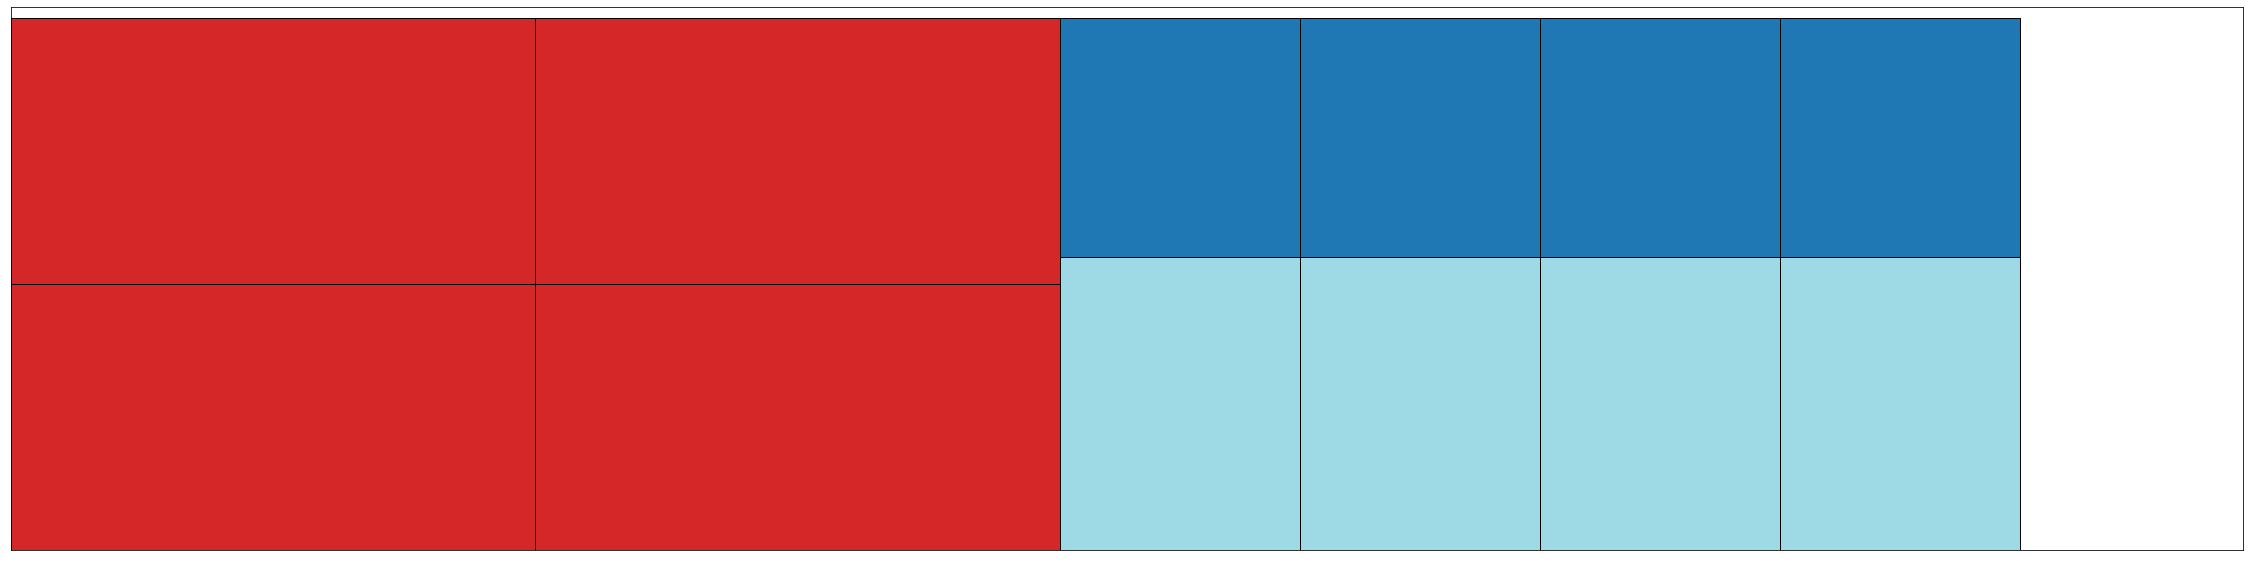

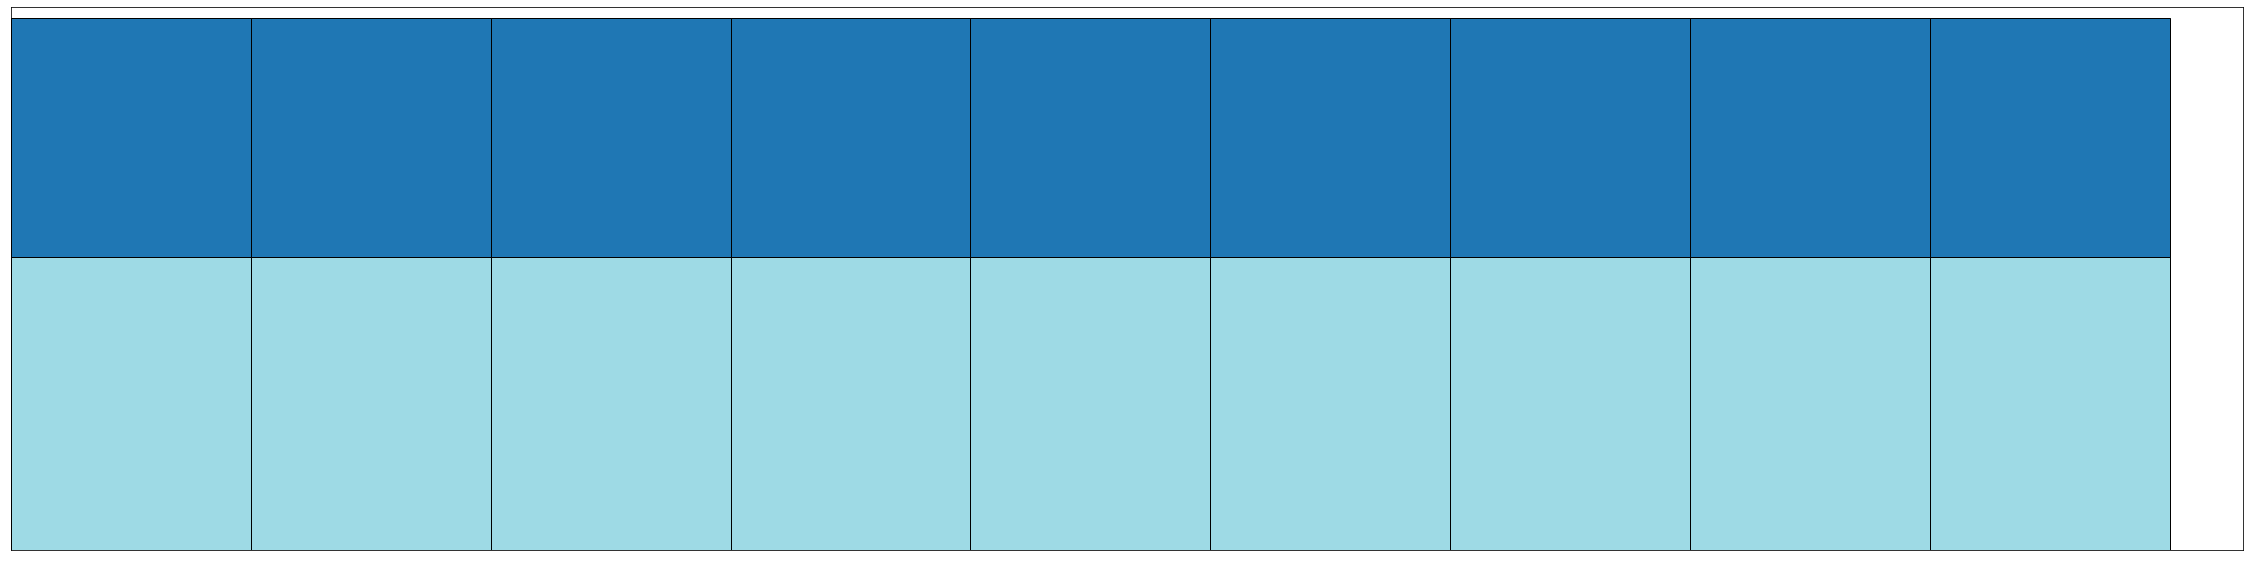

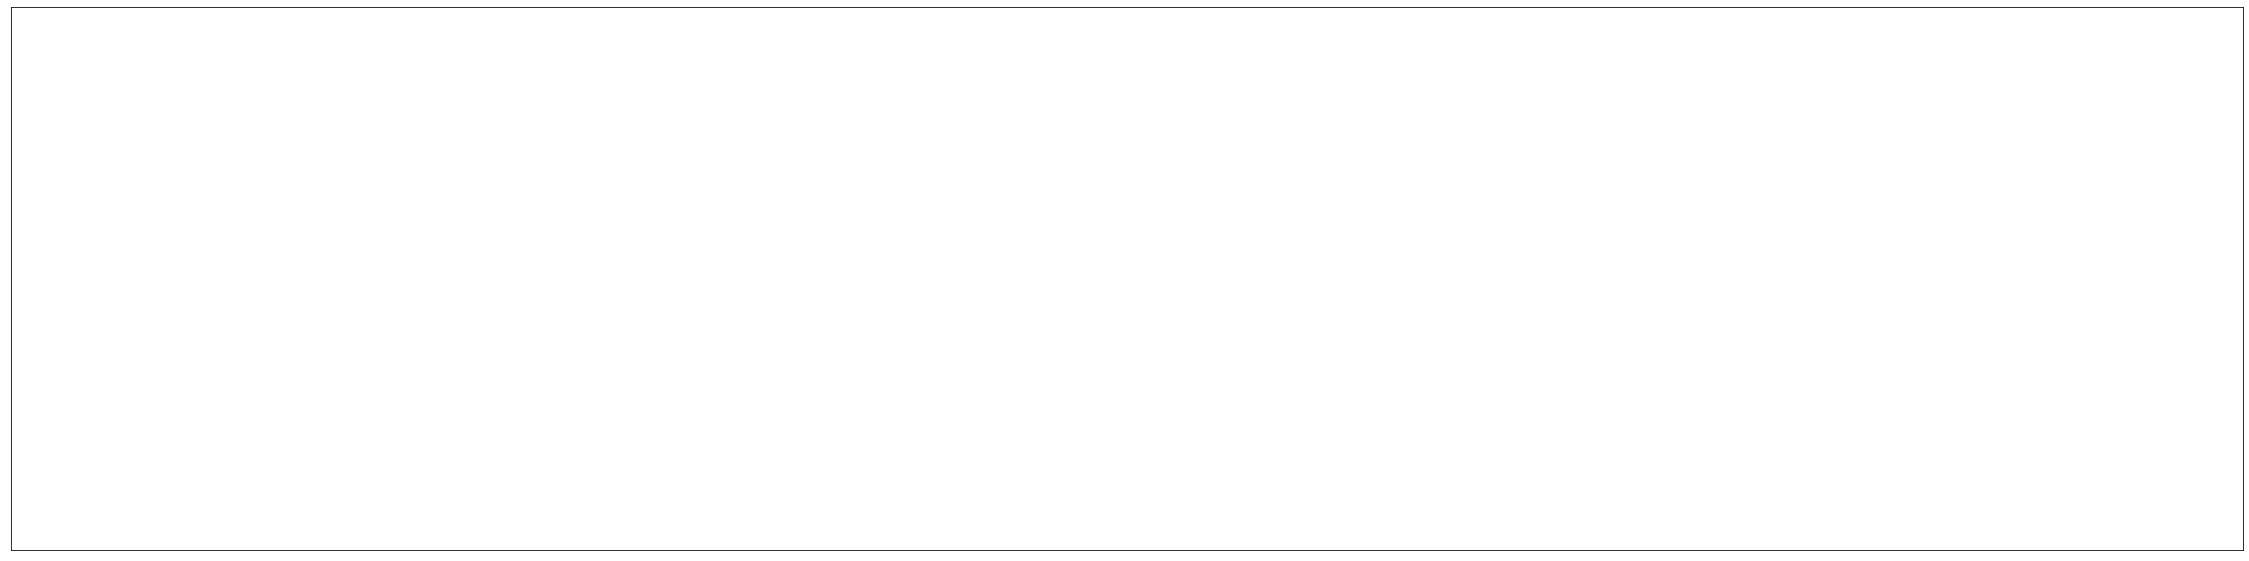

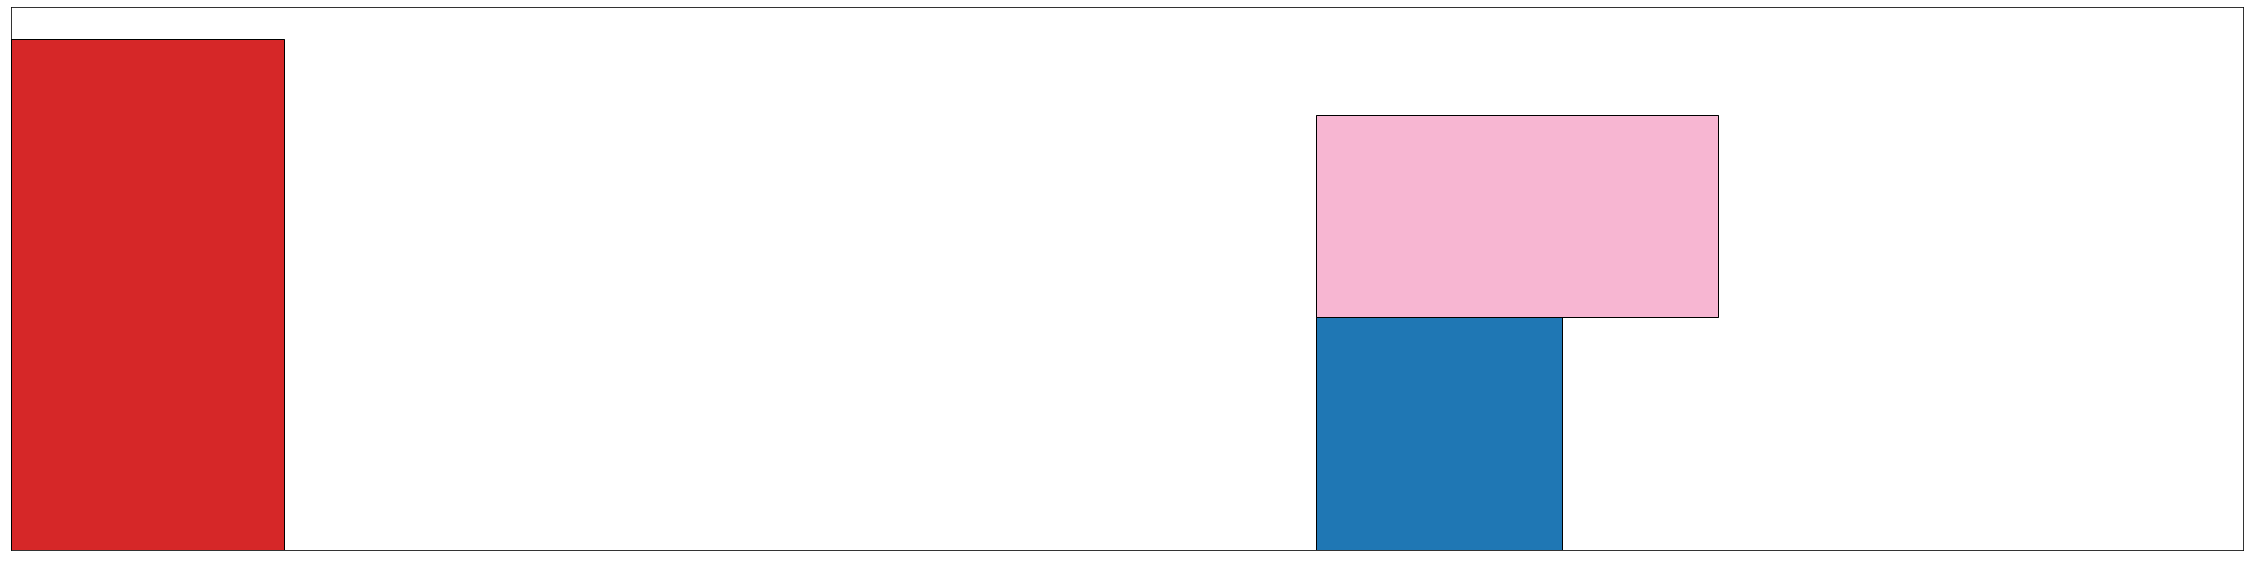

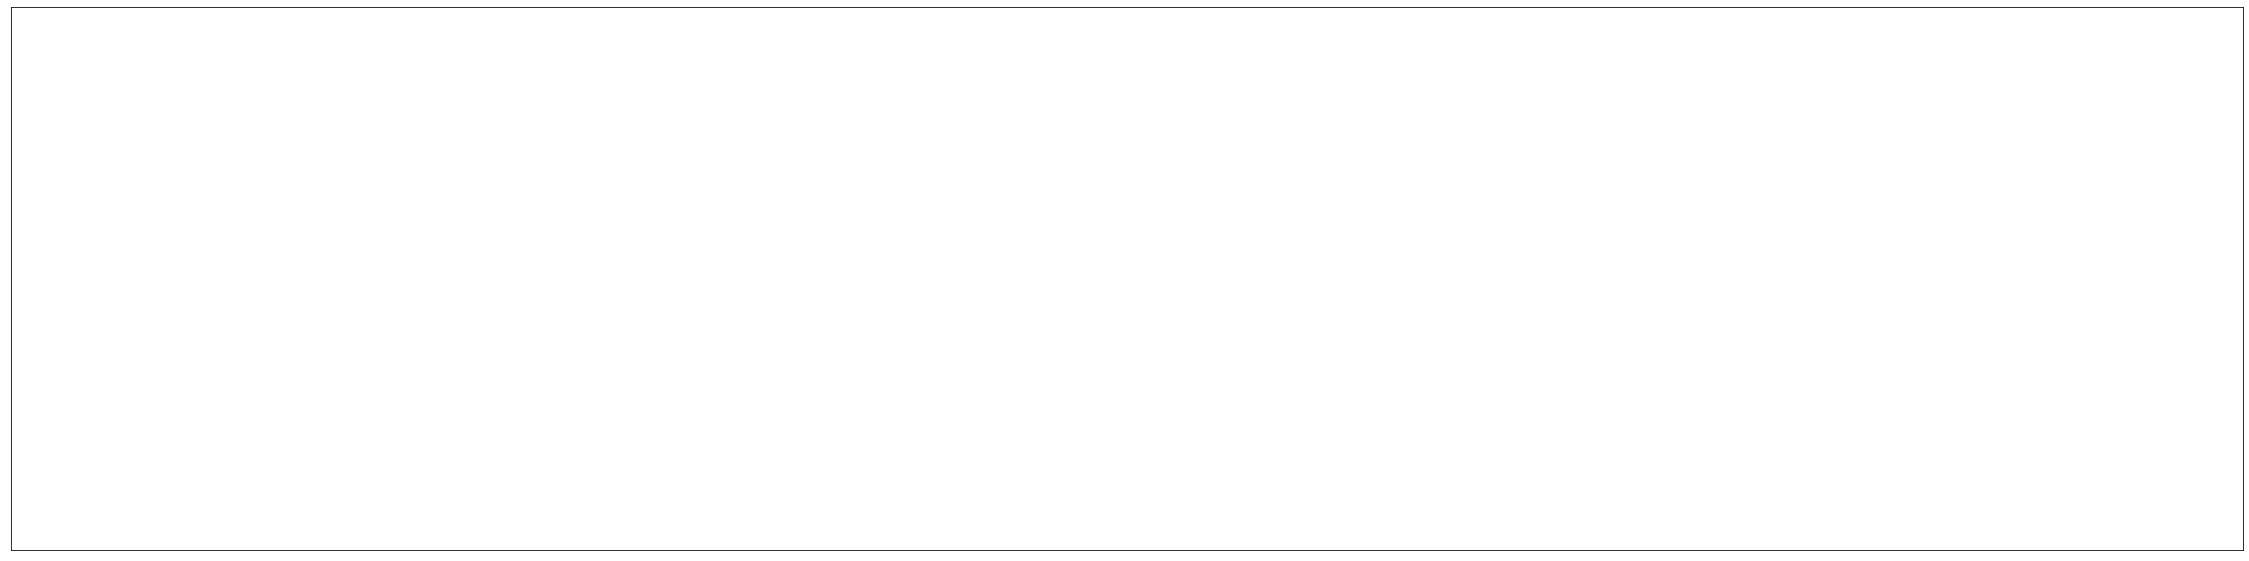

PROBLEM 4_100_400_4_0
{'widths': [44, 49, 37, 43], 'heights': [43, 94, 72, 54], 'deadlines': [95, 97, 383, 472], 'deadline_counts': [[434, 220, 92, 422], [335, 12, 158, 491], [195, 1, 177, 483], [131, 111, 453, 336]], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400, 'max_creel_colors': 1, 'max_creel_number': 5, 'creel_switch_penalty': 10}, 'colors': [0, 1, 2, 3]}
--- CREATING NEW BIN ---
[IV31946, IV31947, IV31951, IV31952, IV31956, IV31957, IV31961, IV31962]
[IV31948, IV31949, IV31953, IV31954, IV31958, IV31959, IV31963, IV31964]
[(IV31946) + (IV31948), (IV31947) + (IV31949), (IV31951) + (IV31953), (IV31952) + (IV31954), (IV31956) + (IV31958), (IV31957) + (IV31959), (IV31961) + (IV31963), (IV31962) + (IV31964)]
[IV31945 > 0, IV31945 > 1, IV31950 > 0, IV31950 > 1, IV31955 > 0, IV31955 > 1, IV31960 > 0, IV31960 > 1]
[IV31966, IV31967, IV31971, IV31972, IV31976, IV31977, IV31981, IV31982]
[IV31968, IV31969, IV31973, IV31974, IV31978, IV31979, IV31983, IV31984]
[(IV3

In [55]:
for minutes in [1]:
    for nr_item_type in nr_item_types:
        for problem in problems:
            for nr_colors in nr_colorss:

                x, y = problem

                file_name = str(nr_item_type) + "_" + str(x) + "_" + str(y) + "_" + str(nr_colors)

                f = open(os.path.join(os.getcwd(), "problems", "_".join([str(i) for i in nr_deadlines]), file_name + ".json"))
                data = json.load(f)

                run_multi_bin_benchmark(solver_models, production_models, single_bin_models, (ProblemJsonCM.init_from_file(data)), args=args)